K-Nearest Neighbours (KNN) -> Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır.

(Gruplama yapılıp hangi gruba yakınsa o gruba dahil.)

EN yakında K tane komşu nokta bulunur, en çok hangi gruptan komşu varsa yeni gelen nokta o gruptan olduğu kabul edilir.

Euclidean Distance

Amaç: Veri setini iki kısma ayıracağız; 1. kısımı modelimizi(KNN) eğitmek için kullancağız, 2. kısmı ise modelin başarısını (% olarak) test etmek için kullanacağız.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Outcome = 0, Sağlıklı 
# Outcome = 1, Diabet, Şeker Hastası

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
seker_hastalari = data[data["Outcome"] == 1]
saglikli_kisiler = data[data["Outcome"] == 0]

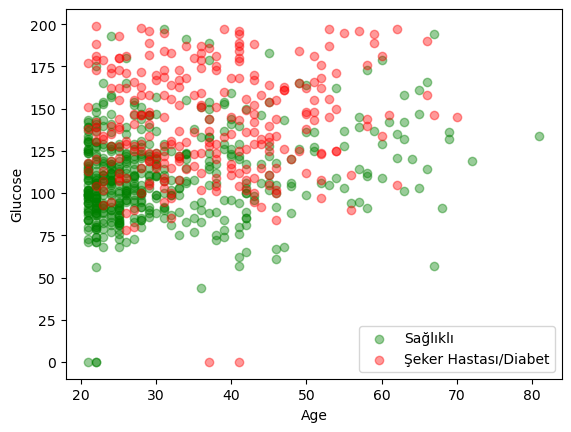

In [9]:
# "Glucose" değerine bakarak örnek bir görselleşirme yapalım. 
# Model bütün değerlere bakarak bir tahmin gerçekleştirecek.
# (x,y,...)

plt.scatter(saglikli_kisiler.Age, saglikli_kisiler.Glucose, color="green", label="Sağlıklı", alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Şeker Hastası/Diabet", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [10]:
# X ve y değişkenleri

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [11]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## Normalizasyon

Normalization ile - X içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz.

Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!

Xnorm = (X − Xmin) / (Xmax − Xmin)

In [13]:
x_norm = (X - np.min(X)) / (np.max(X) - np.min(X))

In [14]:
print("Normalizasyon öncesi veriler:\n")
print(X.head())

Normalizasyon öncesi veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [15]:
print("Normalizasyon sonrası veriler:\n")
print(x_norm.head())

Normalizasyon sonrası veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.000000  0.027541   
3     0.001182  0.105201       0.078014       0.027187  0.111111  0.033215   
4     0.000000  0.161939       0.047281       0.041371  0.198582  0.050946   

   DiabetesPedigreeFunction       Age  
0                  0.000741  0.059102  
1                  0.000415  0.036643  
2                  0.000794  0.037825  
3                  0.000197  0.024823  
4                  0.002704  0.039007  


In [16]:
# Eğitim için kullanacağımız veirleri elde etmiş olduk.

In [42]:
# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=0)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.head())

(614, 8)
(614,)
(154, 8)
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
603     0.008274  0.177305       0.092199       0.034279  0.148936  0.041608   
118     0.004728  0.114657       0.070922       0.027187  0.000000  0.033333   
247     0.000000  0.195035       0.106383       0.039007  0.803783  0.061820   
157     0.001182  0.128842       0.066194       0.024823  0.159574  0.029787   
468     0.009456  0.141844       0.000000       0.000000  0.000000  0.035461   

     DiabetesPedigreeFunction       Age  
603                  0.000818  0.063830  
118                  0.000524  0.026005  
247                  0.000505  0.027187  
157                  0.000985  0.027187  
468                  0.000216  0.044917  


In [52]:
# knn modeli

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors -> k
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("k=3 için Test verileriyle doğruluk sonucu: ", knn.score(x_test, y_test))

k=3 için Test verileriyle doğruluk sonucu:  0.7207792207792207


In [62]:


# peki k kaç olmalı??

# en iyi k değerini bulmak için

for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new = knn_new.fit(x_train, y_train)
    print("k=",k ," için doğruluk oranı -> %", knn_new.score(x_test, y_test)*100)

k= 1  için doğruluk oranı -> % 61.68831168831169
k= 2  için doğruluk oranı -> % 71.42857142857143
k= 3  için doğruluk oranı -> % 72.07792207792207
k= 4  için doğruluk oranı -> % 77.27272727272727
k= 5  için doğruluk oranı -> % 75.32467532467533
k= 6  için doğruluk oranı -> % 77.92207792207793
k= 7  için doğruluk oranı -> % 75.97402597402598
k= 8  için doğruluk oranı -> % 77.92207792207793
k= 9  için doğruluk oranı -> % 77.27272727272727
k= 10  için doğruluk oranı -> % 79.22077922077922


In [58]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_test)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1